In [178]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Part 1: Prepare the Data
Read in the myopia csv file

In [179]:
df = pd.read_csv('myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [180]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [181]:
myopia_df=df.drop("MYOPIC", axis=1)

In [182]:
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [183]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(myopia_df)
df_scaled = pd.DataFrame(
    data=myopia_scaled
)

# Part 2: Apply Dimensionality Reduction

In [184]:
# Applying PCA to reduce dimensions

# Initialize PCA model
# Create a model that preserved 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get the principal components for the myopia data
pca_transformed_data = pca.fit_transform(df_scaled)

In [185]:
pca_transformed_df = pd.DataFrame(
    data=pca_transformed_data
)
pca_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [186]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

Run t-SNE on the principal components to further reduce the dataset dimensions.

In [187]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
transformed_features = tsne.fit_transform(pca_transformed_df)

Create a scatterplot of the TSNE features

In [188]:
# Check that dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [189]:
myopia_df["x"] = transformed_features[:,0]
myopia_df["y"] = transformed_features[:,1]
myopia_df["MYOPIC"] = df["MYOPIC"]

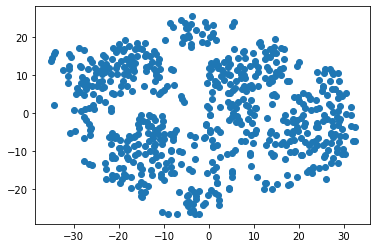

In [190]:
plt.scatter(myopia_df["x"], myopia_df["y"])
plt.show()

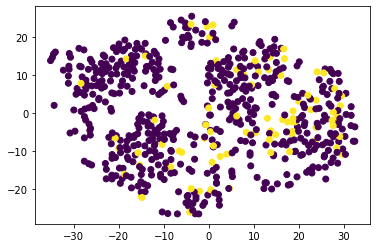

In [192]:
plt.scatter(myopia_df["x"], myopia_df["y"], c=myopia_df["MYOPIC"])
plt.show()

There could be some potential clusters in the dataset.

# Part 3: Perform a Cluster Analysis with K-means

In [165]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\US11338\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


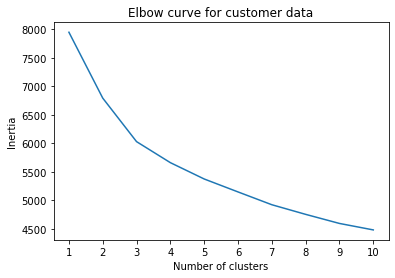

In [166]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Identify the best number of clusters using the elbow curve. The elbow curve indicates 3 as an optimal cluster.

In [150]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [193]:
clusters = get_clusters(3, myopia_df)

In [194]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,10.293683,-5.321350,1,2
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,28.787430,-2.135404,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-19.201330,8.392522,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-6.051559,-10.424357,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,16.019764,16.992514,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,-0.060178,1.274005,1,2
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,29.059193,-1.544712,0,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,30.442400,-0.454901,0,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-25.802961,4.876796,0,0


In [195]:
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

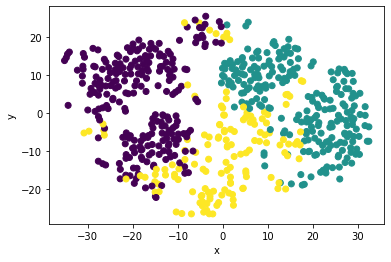

In [196]:
show_clusters(clusters)

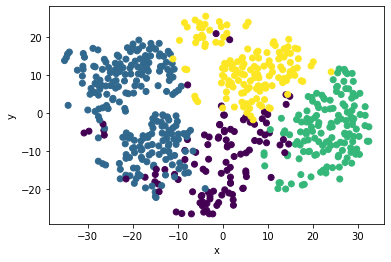

In [201]:
clusters = get_clusters(4, myopia_df)
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
show_clusters(clusters)

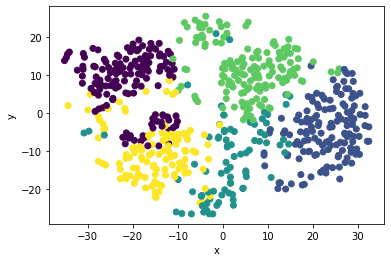

In [202]:
clusters = get_clusters(5, myopia_df)
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
show_clusters(clusters)

Recommendation: It is not recommended to cluster the data at this time. After preparing the data and applying dimensionality reduction using PCA, a K-means model was used for the cluster analysis. The elbow curve showed that 3 clusters may be enough to differentiate between myopic and not myopic, there is still overlap within the three clusters. 

Additional clusters were created to see if there was an effect, but there was further overlap within the 4 or 5 clusters. 
At this time, it is not recommended to cluster the data, but potentially more data and more refining of the model would provide a clearer clustering of the data to show if myopic or not.